In [71]:
# 2. Importing necessary libraries
import gymnasium as gym
import numpy as np
import pandas as pd

In [72]:
# 3.a Enviroment creation
env = gym.make('CliffWalking-v0')

# 3.b Establishing parameters
learning_rate = 0.1
discount = 0.99
epsilon = 0.1
episodes = 1000

# Sarsa

In [73]:
# 4. Implementing SARSA

# Auxiliar function to choose the next action
def choose_next_action(Q, state, epsilon):
    if np.random.uniform(0, 1) < epsilon: return env.action_space.sample()  # Exploration
    else: return np.argmax(Q[state])                                        # Explotation

# 4.a Implementing the SARSA algorithm
def SARSA(env, episodes, learning_rate, discount, epsilon):
    num_actions = env.action_space.n
    num_states = env.observation_space.n

    rewards_per_episode = []
    Q = np.zeros((num_states, num_actions))  # Inicializing the action-value function Q

    # Loop for each episode
    for _ in range(episodes):

        state, _ = env.reset()                          # Initializing S
        action = choose_next_action(Q, state, epsilon)  # Choosing A from S using policy derived from Q
        total_reward = 0
        
        # Loop for each step of episode
        done = False
        while not done:
            next_state, reward, terminated, truncated, _ = env.step(action)  # Taking action A, observing R, S'
            done = terminated or truncated
            
            next_action = choose_next_action(Q, next_state, epsilon)
            Q[state, action] += learning_rate * (reward + (discount * Q[next_state, next_action]) - Q[state, action])
                        
            state = next_state      # S <- S'
            action = next_action    # A <- A'

            total_reward += reward

        rewards_per_episode.append(total_reward)

    # 4.b Returning the rewards per episode and the action-value function Q
    return rewards_per_episode, Q

In [74]:
rewards_per_episode, Q = SARSA(env, episodes, learning_rate, discount, epsilon)

In [75]:
df = pd.DataFrame(rewards_per_episode, columns=['reward'])
df.to_csv('Results/SARSA_rewards.csv', index=False)

# Q Learning

In [76]:
#Implementing Q-Learning

# Auxiliary function to choose the next action
def choose_next_action(Q, state, epsilon):
    if np.random.uniform(0, 1) < epsilon: 
        return env.action_space.sample()  # Exploration
    else: 
        return np.argmax(Q[state])  # Exploitation

# 4.a Implementing the Q-Learning algorithm
def QLearning(env, episodes, learning_rate, discount, epsilon):
    num_actions = env.action_space.n
    num_states = env.observation_space.n

    rewards_per_episode = []
    Q = np.zeros((num_states, num_actions))  # Initializing the action-value function Q

    # Loop for each episode
    for _ in range(episodes):

        state, _ = env.reset()                          # Initializing S
        total_reward = 0
        
        # Loop for each step of episode
        done = False
        while not done:
            action = choose_next_action(Q, state, epsilon)  # Choose A from S using policy derived from Q
            next_state, reward, terminated, truncated, _ = env.step(action)  # Taking action A, observing R, S'
            done = terminated or truncated
            
            # Q-Learning update rule
            Q[state, action] += learning_rate * (reward + (discount * np.max(Q[next_state])) - Q[state, action])
                        
            state = next_state  # S <- S'

            total_reward += reward

        rewards_per_episode.append(total_reward)

    # 4.b Returning the rewards per episode and the action-value function Q
    return rewards_per_episode, Q

In [77]:
rewards_per_episode, Q = QLearning(env, episodes, learning_rate, discount, epsilon)

In [78]:
df = pd.DataFrame(rewards_per_episode, columns=['reward'])
df.to_csv('Results/QLearning_rewards.csv', index=False)

# Graficando Rewards

In [79]:
sarsa_rewards = pd.read_csv('Results/SARSA_rewards.csv')
qlearning_rewards = pd.read_csv('Results/QLearning_rewards.csv')

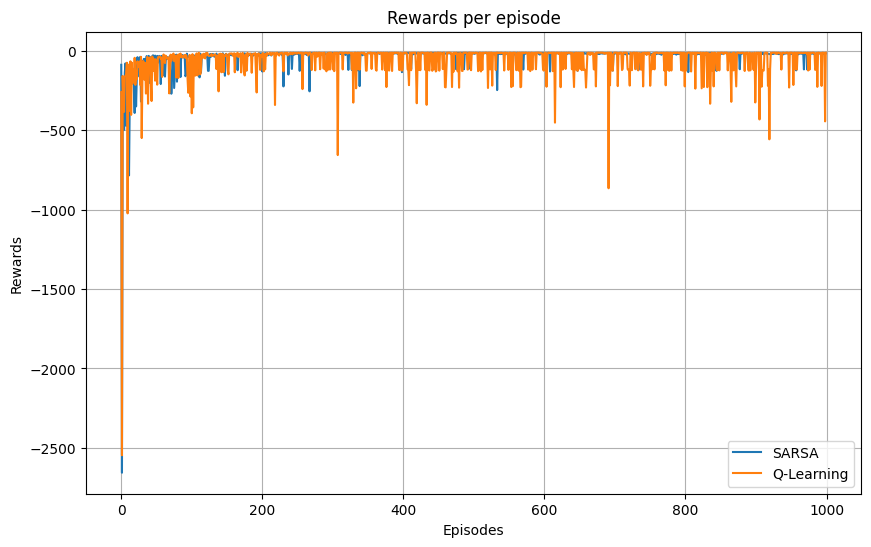

In [80]:
import matplotlib.pyplot as plt
# Plotting the rewards per episode
plt.figure(figsize=(10, 6))
plt.plot(sarsa_rewards, label='SARSA')
plt.plot(qlearning_rewards, label='Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Rewards per episode')
plt.legend()
plt.grid()
plt.show()


# Preguntas

### ¿Qué diferencias observa en los patrones de recompensa entre SARSA y Q-Learning?
Se observa que las recompensas en Q Learning tienen una mayor variación entre episodios que SARSA, porque trata de maximizar la recompensa en cada paso sin tomar en cuenta la acción.
### ¿Por qué Q-Learning tiende a ser más optimista en sus actualizaciones de valor Q en comparación con SARSA?
Debido a la forma en la que Q Learning utiliza el off policy para actualizar sus valores. Este utiliza el valor v del siguiente estado sin importar la politica que se esta siguiendo. Por lo tanto, aunque el agente tome soluciones sub optimas, Q Learning siempre actualizara sus valores suponiendo que se elige la mejor acción.
### ¿Cómo afecta la naturaleza "on-policy" de SARSA a su proceso de aprendizaje en comparación con la naturaleza "off-policy" de Q-Learning?
La naturaleza "on-policy" de SARSA afecta su proceso de aprendizaje en comparación con la naturaleza "off-policy" de Q Learning de la siguiente manera:
- SARSA: Aprende de la política que se está siguiendo, por lo que tiende a ser más conservador y seguro.
- Q Learning: Aprende de la política óptima, por lo que tiende a ser más arriesgado y a explorar más el entorno.
### Según las penalizaciones y recompensas del entorno, ¿qué algoritmo parece aprender el camino más seguro? ¿Por qué?
SARSA parece aprender el camino más seguro, porque toma en cuenta la acción que se va a tomar en el siguiente estado, por lo que no se arriesga a tomar acciones que puedan llevar a un estado no deseado.
### ¿Cómo podría afectar la disminución de épsilon con el tiempo al rendimiento de cada algoritmo?
La disminución de épsilon con el tiempo afectaría el rendimiento de cada algoritmo de la siguiente manera:
- SARSA: Disminuir épsilon con el tiempo haría que el agente se vuelva más conservador y tienda a tomar acciones seguras.
- Q Learning: Disminuir épsilon con el tiempo haría que el agente siga explorando el entorno, ya que no toma en cuenta la acción que se va a tomar en el siguiente estado.
